# Part 2 - baseline model performance

## Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

from src import *

## Loading data

In [2]:
dataloader = CSVDataLoader('data/MSFT_2006-01-01_to_2018-01-01.csv')
raw_df = dataloader.load()

print(raw_df.info())
print()
print(raw_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB
None

         Date   Open   High    Low  Close     Volume  Name
0  2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
1  2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2  2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
3  2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
4  2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT


## Create datasets

In [3]:
X_train_1, X_test_1 = dataloader.split_by_year([2006, 2008], [2009])

print(X_train_1.shape)
print(X_train_1[0, :])

y_train_1 = X_train_1[:, 4]
y_test_1 = X_test_1[:, 4]

(504, 27)
[2.6250000e+01 2.7000000e+01 2.6100000e+01 7.9974418e+07 2.6840000e+01
 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]


## Autoregressive model

2.440134306060711


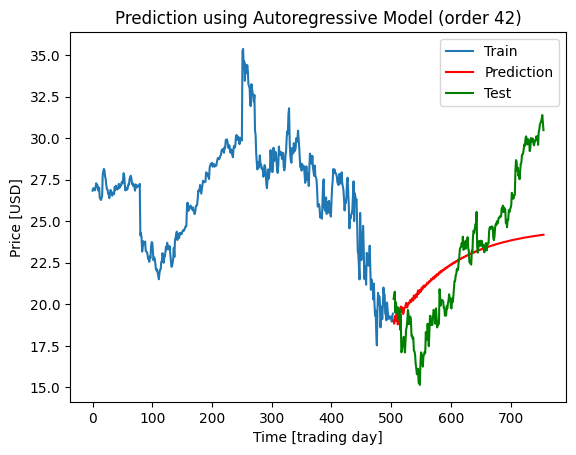

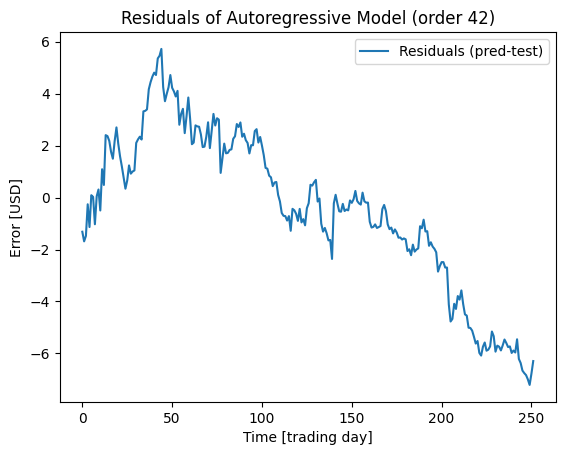

In [4]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error

# Fit AR model
lags = 42
model = AutoReg(y_train_1, lags=lags)
model_fit = model.fit()

# Predict
pred = model_fit.forecast(steps=len(y_test_1))

# Compute MAE
mae = mean_absolute_error(pred, y_test_1)
print(mae)

# Plot predictions
plt.plot(y_train_1, label='Train')
plt.plot(range(len(y_train_1), (len(y_train_1)+len(y_test_1))), pred, label='Prediction', color='red')
plt.plot(range(len(y_train_1), (len(y_train_1)+len(y_test_1))), y_test_1, label='Test', color='green')
plt.title(f'Prediction using Autoregressive Model (order {lags})')
plt.xlabel('Time [trading day]')
plt.ylabel('Price [USD]')
plt.legend()
plt.savefig(f'images/autoregression_model/autoregressive_model_prediction_{lags}_{mae:.2f}.png', dpi=200, bbox_inches='tight')
plt.show()

# Plot residuals
plt.plot(pred-y_test_1, label='Residuals (pred-test)')
plt.title(f'Residuals of Autoregressive Model (order {lags})')
plt.xlabel('Time [trading day]')
plt.ylabel('Error [USD]')
plt.legend()
plt.savefig(f'images/autoregression_model/autoregressive_model_residuals_{lags}_{mae:.2f}.png', dpi=200, bbox_inches='tight')
plt.show()

In [5]:
maes = []
iis = []
min_mae = float('inf')
min_i = float('inf')
for i in range(1, 200):
    model = AutoReg(y_train_1, lags=i)
    model_fit = model.fit()

    # Predict
    pred = model_fit.forecast(steps=len(y_test_1))

    # Compute MAE
    mae = mean_absolute_error(pred, y_test_1)
    maes.append(mae)
    iis.append(i)

    if min_mae > mae:
        min_mae = mae
        min_i = i

print(f"The best mae={min_mae} for lag={min_i}")

The best mae=1.2217774280226787 for lag=166


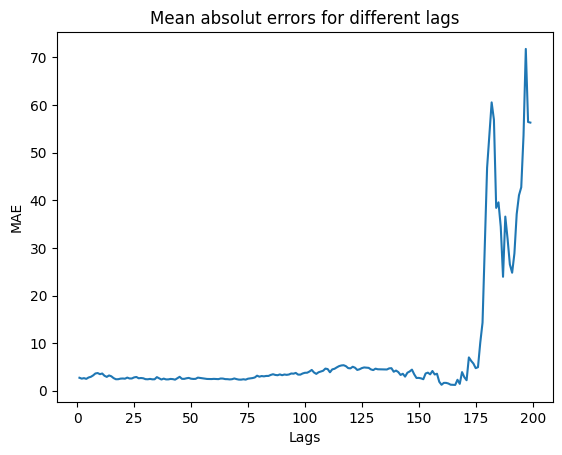

In [6]:
plt.plot(iis, maes)
plt.title(f'Mean absolut errors for different lags')
plt.xlabel('Lags')
plt.ylabel('MAE')
plt.savefig(f'images/autoregression_model/autoregressive_model_MAE_all_lags.png', dpi=200, bbox_inches='tight')
plt.show()